In [1]:
#importing necessary modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Overview of Data

In [2]:
# Reading the data dictionary file.
df_structure = pd.read_csv('data-dictionary+.csv')
df_structure

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [3]:
#reading data file.
country  = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Shape of data.
country.shape

(167, 10)

#### There are 167 rows and 10 columns.

In [5]:
#Summary of data.
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Data Cleaning

In [6]:
cols = list(country.columns)

In [7]:
#Checking Null values.
for col_name in cols:
    print("Number of Null in {} : {}".format(col_name,country[col_name].isnull().sum()))

Number of Null in country : 0
Number of Null in child_mort : 0
Number of Null in exports : 0
Number of Null in health : 0
Number of Null in imports : 0
Number of Null in income : 0
Number of Null in inflation : 0
Number of Null in life_expec : 0
Number of Null in total_fer : 0
Number of Null in gdpp : 0


In [8]:
#Checking NaN values.
for col_name in cols:
    print("Number of NaN in {} : {}".format(col_name,country[col_name].isna().sum()))

Number of NaN in country : 0
Number of NaN in child_mort : 0
Number of NaN in exports : 0
Number of NaN in health : 0
Number of NaN in imports : 0
Number of NaN in income : 0
Number of NaN in inflation : 0
Number of NaN in life_expec : 0
Number of NaN in total_fer : 0
Number of NaN in gdpp : 0


#### There are no Null or NaN values

In [9]:
#Data type of each column.
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [10]:
#checking duplicates
sum(country.duplicated(subset = 'country')) == 0

True

#### No Duplicates and Data looks Clean. No cleaning is required

# Textual and Graphical Summary

In [11]:
#Data description.
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


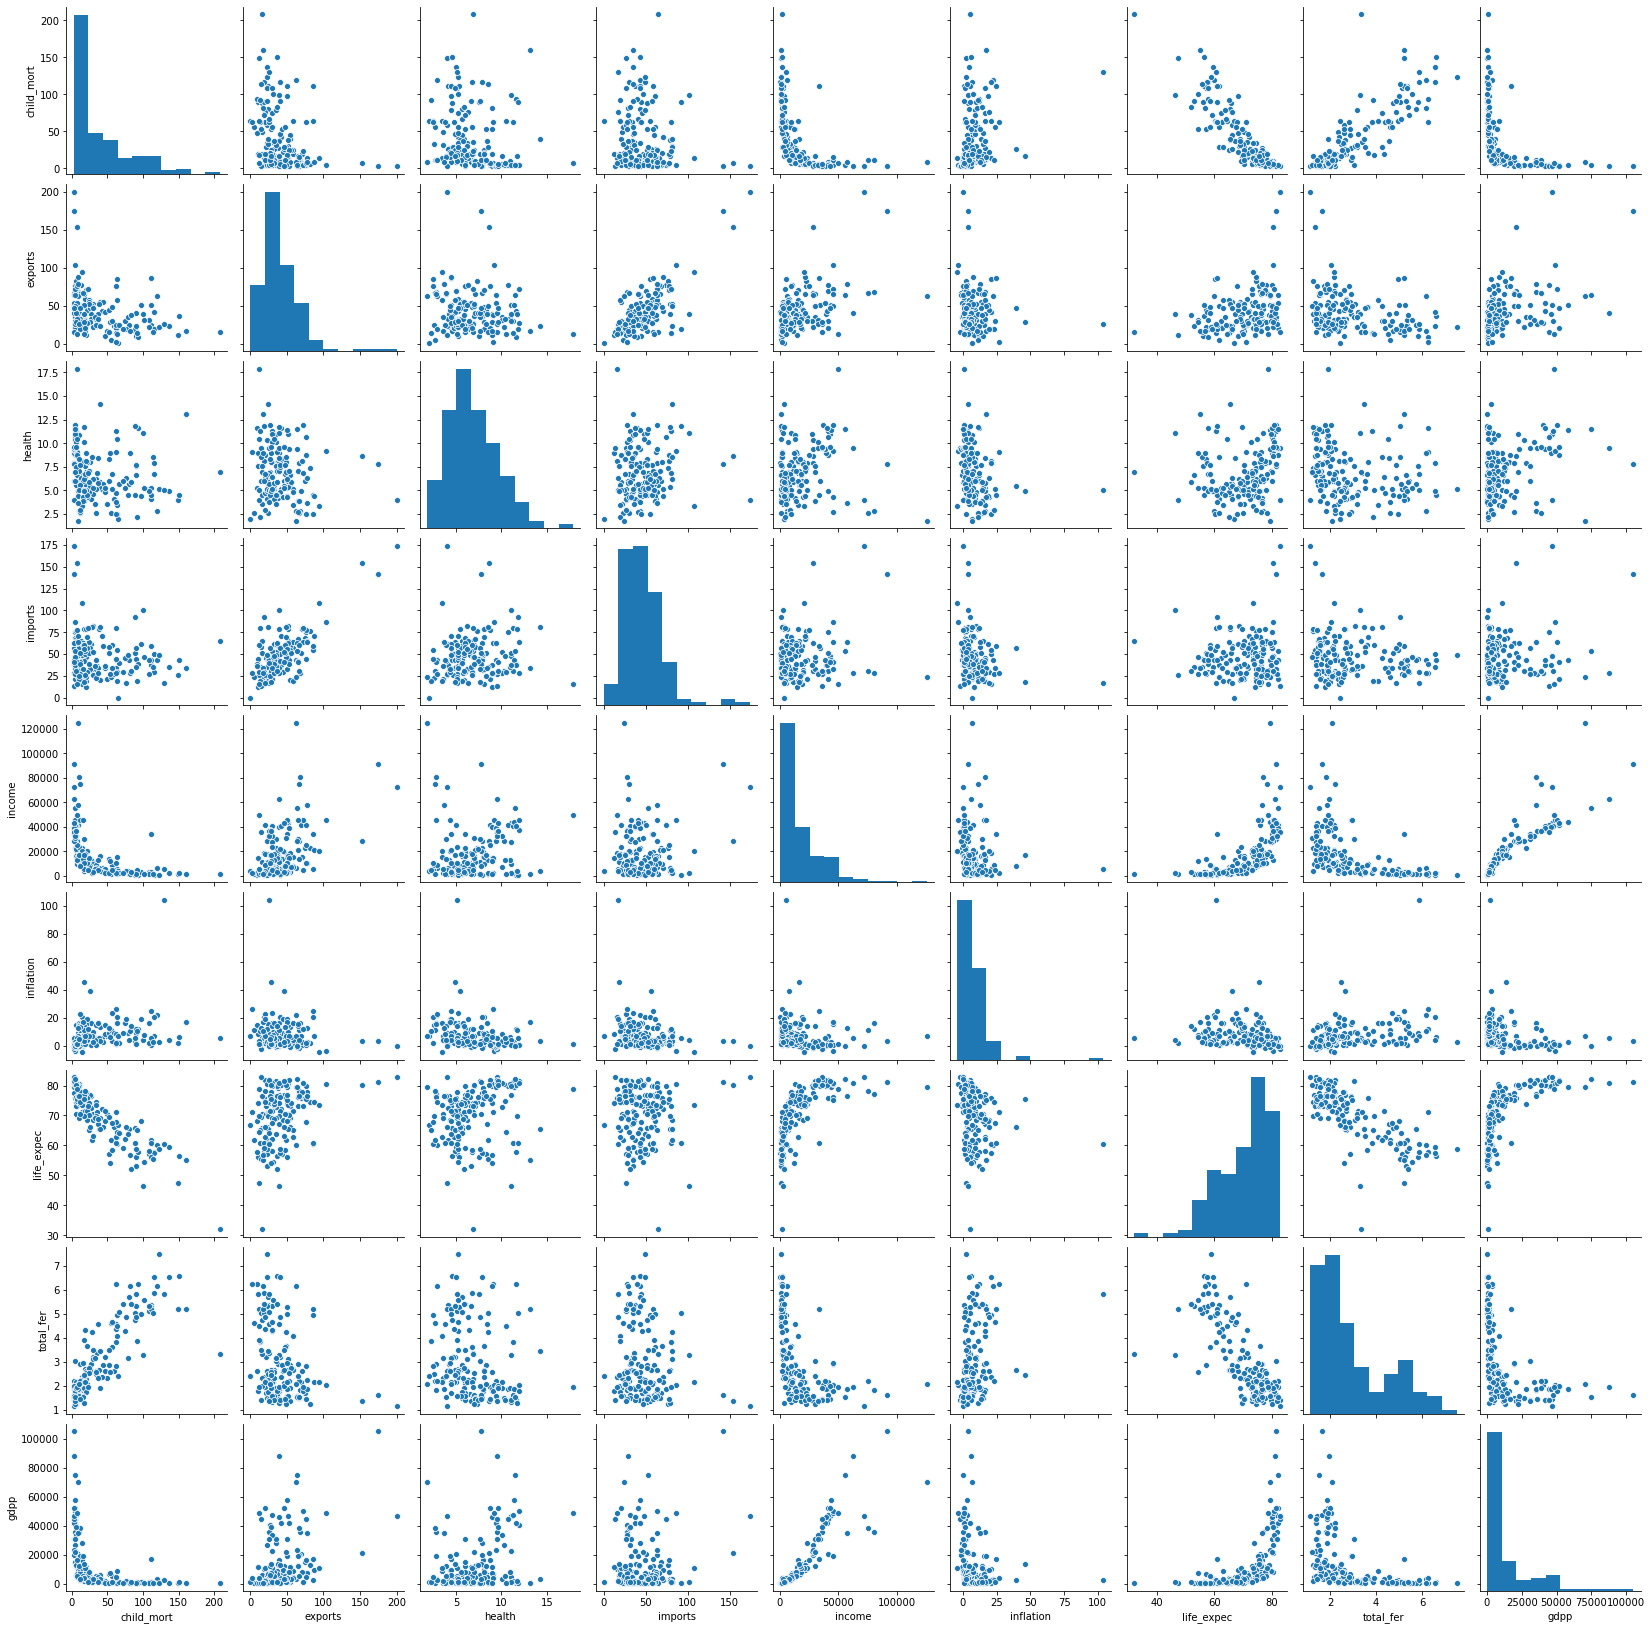

In [13]:
#plotting pairplots
sns.pairplot(country)

#### As we can see from the Pairplot there is high correlation between features of the data. So we will go for Dimensionality Reduction

# Data Preprocessing

#### Derived Metrics : Converting exports,imports and health spending percentages to absolute values

In [14]:
# Converting exports,imports and health spending percentages to absolute values.
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health'] *country['gdpp']/100

In [15]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler
country_copy = country.copy()
# Create a scaling object
scaler = StandardScaler()
# Create a list of the variables that you need to scale
col = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
country[col] = scaler.fit_transform(country[col])

In [16]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


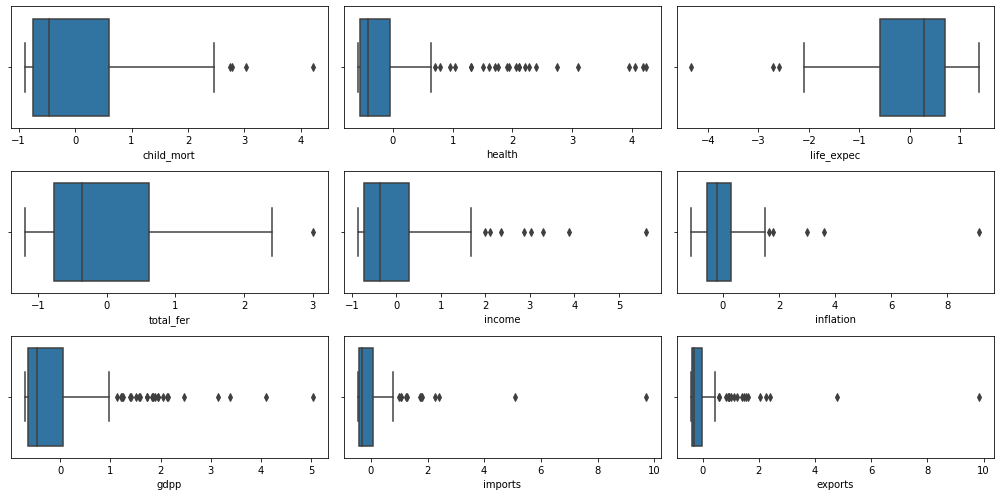

In [17]:
#Box plot to visualize data statistics and outliers.
fig, axs = plt.subplots(3,3, figsize = (14,7))
plt1 = sns.boxplot(country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country['health'], ax = axs[0,1])
plt3 = sns.boxplot(country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country['income'], ax = axs[1,1])
plt6 = sns.boxplot(country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country['exports'], ax = axs[2,2])
plt.tight_layout()

#### As there are many outliers we will check after applying dimensionality reduction.

In [18]:
#Using PCA for dimensionality reduction
pca = PCA()
# Putting feature variable to X
X = country.drop(['country'],axis=1)

# Putting response variable to y
y = country['country']
#Doing the PCA on the train data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

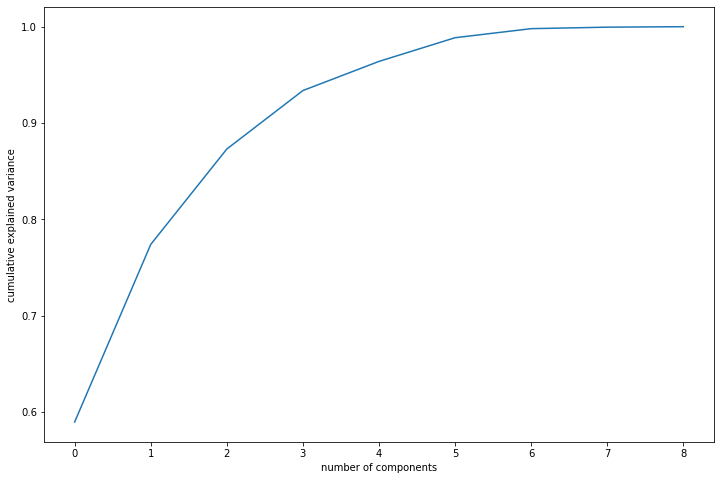

In [20]:
# PLotting cumulative variance
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

Text(0, 0.5, 'Proprotion of variance explained')

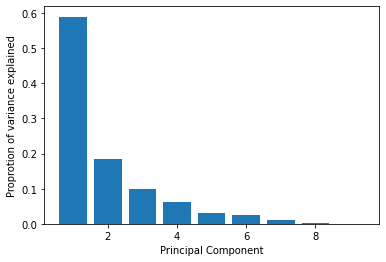

In [21]:
#Bar plot for cumulative variance 
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Proprotion of variance explained')

#### It is evident from the above plot that more than 90% variance is explained by the first 3 principal components. Hence, we will use these components only going forward for Clustering process.

In [22]:
three_first_cum_var_exp = pca.explained_variance_ratio_.cumsum()[3]
print("The cumulative variance of the first three principal components is {} ".format(round(three_first_cum_var_exp,5)))

The cumulative variance of the first three principal components is 0.93366 


#### The cumulative variance of the first three principal components is 0.93366

In [23]:
# Fitting the scaled df on pca
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X)
df_pca.shape

(167, 3)

In [24]:
#Taking columns as components
y = pd.DataFrame(y)
df_pca = pd.DataFrame(df_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([y, df_pca], axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,-0.459557,-0.675495,0.959355
3,Angola,-2.722630,2.172332,0.600215
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430


# Data Visualising after PCA

(3.5, -0.5)

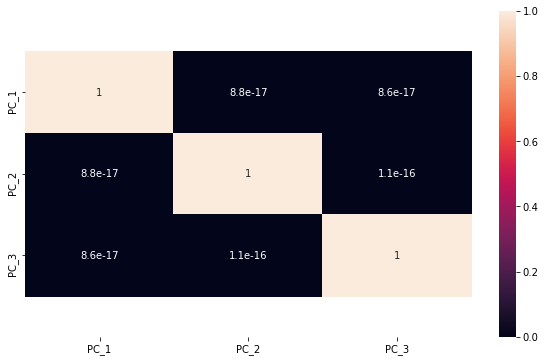

In [25]:
# Plotting Heatmap to check if there is still dependency in the dataset.
plt.figure(figsize = (10,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### As we can see there is almost no correaltion

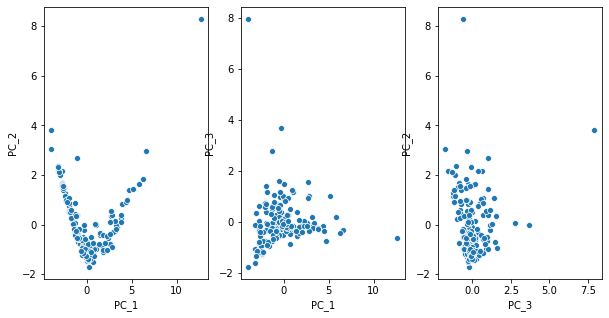

In [26]:
#PLotting scatter plot of components
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

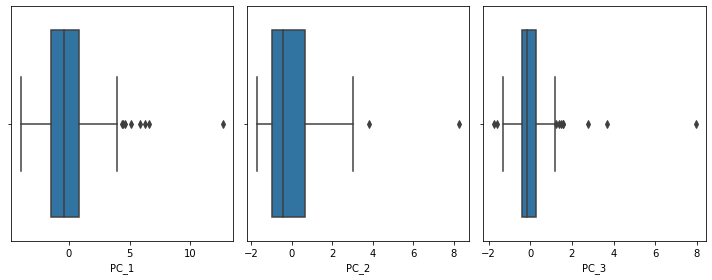

In [27]:
#box plot to remove outliers.
fig, axs = plt.subplots(1,3, figsize = (10,4))
plt1 = sns.boxplot(df_pca_final['PC_1'],ax=axs[0])
plt2 = sns.boxplot(df_pca_final['PC_2'],ax=axs[1])
plt3 = sns.boxplot(df_pca_final['PC_3'],ax=axs[2])
plt.tight_layout()

In [28]:
# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

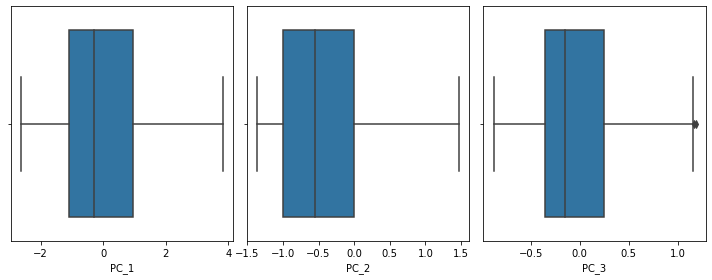

In [29]:
fig, axs = plt.subplots(1,3, figsize = (10,4))
plt1 = sns.boxplot(df_pca_final['PC_1'],ax=axs[0])
plt2 = sns.boxplot(df_pca_final['PC_2'],ax=axs[1])
plt3 = sns.boxplot(df_pca_final['PC_3'],ax=axs[2])
plt.tight_layout()

In [30]:
df_pca_final.head()


,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.635575,1.472267,-0.549489
2,Algeria,-0.459557,-0.675495,0.959355
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430
6,Armenia,-0.334555,-1.271889,0.190564
7,Australia,3.181525,-0.262485,-0.130870


In [31]:
# Reindexing
df_pca_final = df_pca_final.reset_index(drop=True)

In [32]:
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Algeria,-0.459557,-0.675495,0.959355
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430
3,Armenia,-0.334555,-1.271889,0.190564
4,Australia,3.181525,-0.262485,-0.130870


In [33]:
df_pca_final_data = df_pca_final.drop(['country'],axis=1)

In [34]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.635575,1.472267,-0.549489
1,-0.459557,-0.675495,0.959355
2,0.648597,-1.023437,-0.257430
3,-0.334555,-1.271889,0.190564
4,3.181525,-0.262485,-0.130870


# Fitting K-Means Clustering

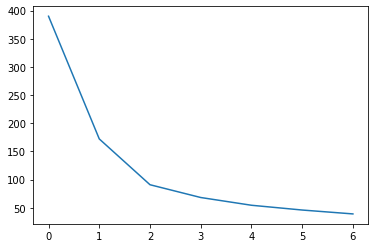

In [35]:
from sklearn.cluster import KMeans
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### Checking clustering with k = 3

In [36]:
#K-means with k=3 clusters
cluster_3 = KMeans(n_clusters=3, max_iter=50, random_state= 100)
cluster_3.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [37]:
#labels of data
cluster_3.labels_

array([2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 2, 1, 2])

In [38]:
# Assign the label
df_pca_final['Cluster_Id'] = cluster_3.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.635575,1.472267,-0.549489,2
1,Algeria,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,1
3,Armenia,-0.334555,-1.271889,0.190564,1
4,Australia,3.181525,-0.262485,-0.130870,0


In [39]:
df_pca_final['Cluster_Id'].value_counts()

1    61
2    31
0    27
Name: Cluster_Id, dtype: int64

#### There are good amount of points in all clusters

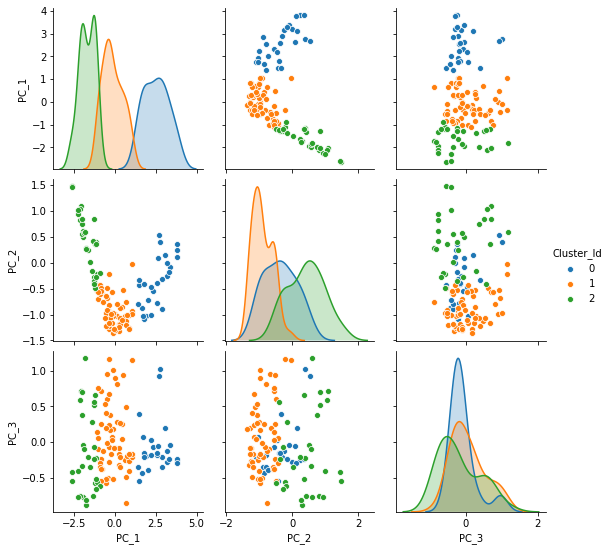

In [40]:
# Scatter plot on Principal components to visualize the spread of the data

sns.pairplot(df_pca_final,hue = "Cluster_Id")

#### There is more intra distance in clusters. Trying with more clusters.

#### Checking with 4 clusters

In [41]:
# Droping the Cluster Id created with 3 clusters and checking with 4 clusters.

df_pca_final = df_pca_final.drop('Cluster_Id',axis=1)

In [42]:
#K-means with k=4 clusters

cluster_4 = KMeans(n_clusters=4, max_iter=100,random_state=100)
cluster_4.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [43]:
# Cluster labels

cluster_4.labels_

array([3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 1, 0,
       1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 3, 1, 2, 3, 0,
       1, 1, 1, 0, 2, 1, 1, 1, 3, 0, 2, 1, 2, 1, 1, 3, 2, 1, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 3, 0, 1, 1, 1, 1, 3, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 1, 2, 1, 3, 1, 1, 0, 1, 3,
       1, 2, 2, 2, 0, 1, 1, 1, 3])

In [44]:
# assign the label

df_pca_final['Cluster_Id'] = cluster_4.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.635575,1.472267,-0.549489,3
1,Algeria,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,0
3,Armenia,-0.334555,-1.271889,0.190564,1
4,Australia,3.181525,-0.262485,-0.130870,2


In [45]:
# Number of countries in each cluster

df_pca_final['Cluster_Id'].value_counts()

1    48
0    29
3    23
2    19
Name: Cluster_Id, dtype: int64

#### There are good amount of points in each cluster

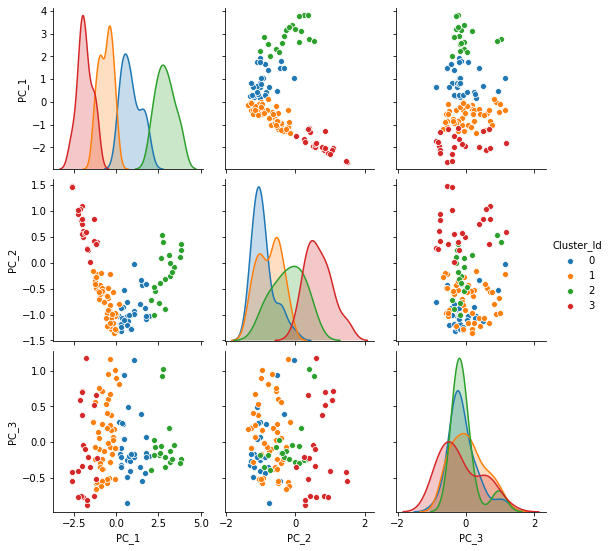

In [46]:
sns.pairplot(df_pca_final,hue = "Cluster_Id")

# Visualising Data after K-Means Custering Model

#### A little less intra distance comapred to 3 clusters. So, we will continue with 4 clusters

In [47]:
# Merging the df with PCA with original df

df_merge = pd.merge(country_copy,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,9.955172,7351.261724,7237.113793,1063.495000,22565.517241,3.297172,76.279310,1.858966,14783.448276
1,1,29.006250,1348.838303,1569.678564,212.933342,8136.875000,7.843563,71.070833,2.553958,3708.791667
2,2,4.968421,16178.347368,14919.478947,3808.275263,40536.842105,2.482895,80.500000,1.744211,39452.631579
3,3,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.739130


#### From the business understanding we have learnt that Child_Mortality, Income, GDP are some important factors which decides the development of any country

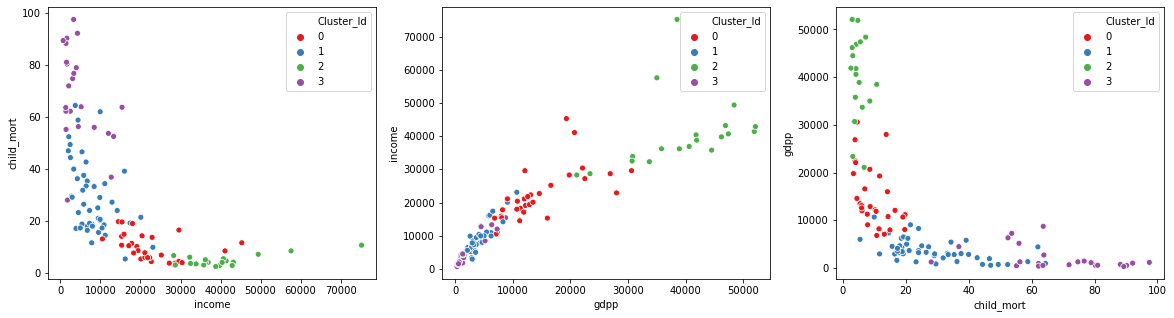

In [53]:
#Scatter plot for Child_Mortality, Income, Gdpp for four clusters
fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1",ax=axes[0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1",ax=axes[1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1",ax=axes[2])

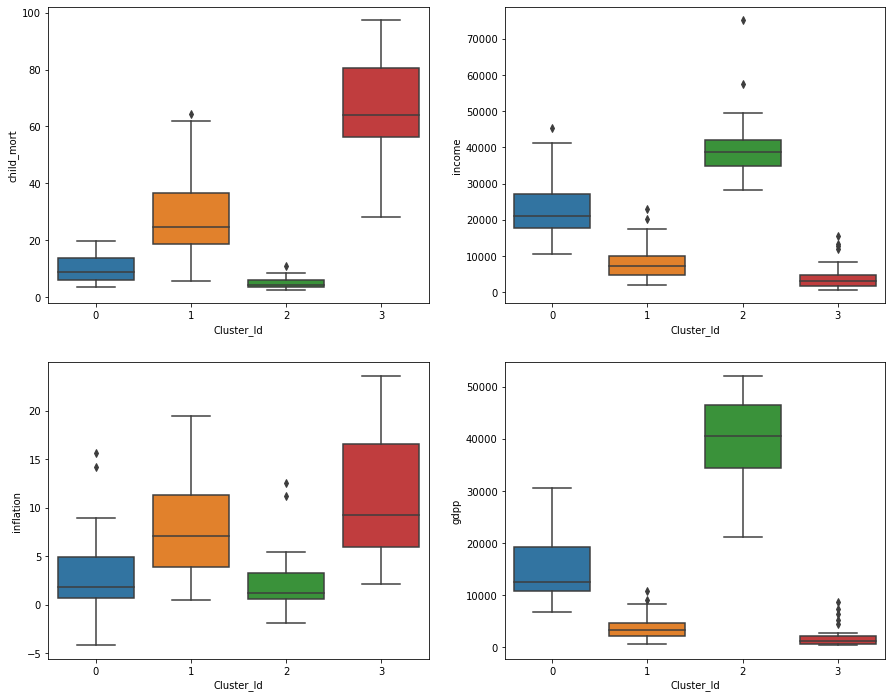

In [51]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])

#### As we can see from the above plots. Cluster 1 and 3 require Aid. More importantly countries in cluster 3 require aid immediately

In [55]:
#list of countries in cluster 3
df_merge_col[df_merge_col['Cluster_Id']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,3
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,3
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,3
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,3
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,3
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,3
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,3
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,3
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,3
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,3


# Final Analysis

In [71]:
#getting countries in cluster 3
df_clus3 = df_merge_col[df_merge_col['Cluster_Id'] ==3]

In [72]:
df_clus3.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,3
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,3
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,3
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,3
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,3


In [73]:
df_clus3.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.0
mean,68.478261,884.774513,838.634174,135.873852,4650.869565,10.711304,62.169565,4.507391,2152.73913,3.0
std,17.761039,1273.692420,927.250521,177.658325,4451.616574,6.290252,3.883817,0.889301,2457.99392,0.0
min,28.100000,23.087800,112.306000,12.821200,700.000000,2.090000,54.300000,2.590000,327.00000,3.0
25%,56.150000,115.067500,222.128000,40.251700,1575.000000,5.910000,59.850000,4.160000,579.00000,3.0
50%,63.900000,291.560000,397.573000,53.609500,3060.000000,9.250000,62.200000,4.600000,1140.00000,3.0
75%,80.650000,1204.485000,1273.130000,101.915500,4835.000000,16.600000,65.400000,4.965000,2110.00000,3.0
max,97.400000,5048.750000,3257.550000,650.832000,15400.000000,23.600000,68.200000,6.150000,8750.00000,3.0


### Adding outliers removed during data preprocessing. Outliers in this problem are very important as they may be the countries in dire need of aid

In [74]:
#Including all the countries which have child mortality greater than 68
df_final_list = country_copy[country_copy['child_mort']>68]
df_final_list.shape

(33, 10)

In [75]:
# Checking the summary of the resultant data
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,107.603030,720.019764,71.657421,658.533727,3071.606061,12.534394,57.821212,5.297879,1385.363636
std,28.901897,2534.127459,127.738035,1715.885000,5652.201274,17.740437,6.737292,0.963972,2895.047202
min,71.900000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.150000,231.000000
25%,89.300000,101.745000,31.946400,192.544000,1210.000000,4.300000,56.200000,4.980000,488.000000
50%,101.000000,140.400000,41.917400,279.624000,1660.000000,9.200000,58.000000,5.310000,702.000000
75%,116.000000,386.450000,64.660000,428.314000,3060.000000,16.100000,60.900000,5.840000,1200.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,68.200000,7.490000,17100.000000


In [76]:
#including countries with income less than 3071
df_final_list1 = df_final_list[df_final_list['income']<=3071]
df_final_list1.shape

(25, 10)

In [77]:
# Checking the summary of the resultant data
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,110.508000,172.642088,42.943636,301.441720,1535.320000,7.589400,56.440000,5.414400,657.480000
std,31.059418,142.225351,22.793148,222.728207,658.728366,5.542405,6.701368,0.943301,308.640584
min,71.900000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,90.200000,81.503000,31.078000,170.200000,1030.000000,3.870000,55.600000,5.050000,446.000000
50%,108.000000,131.274000,38.586000,248.297000,1430.000000,5.470000,57.500000,5.340000,575.000000
75%,116.000000,196.176000,46.495000,353.700000,1870.000000,10.600000,59.300000,5.870000,758.000000
max,208.000000,617.320000,129.870000,1181.700000,3060.000000,20.800000,65.900000,7.490000,1310.000000


In [78]:
#including countries which have gdp less than 657
df_final_list2 = df_final_list1[df_final_list1['gdpp']<=657]
df_final_list2.shape

(15, 10)

In [85]:
#Printing the final lsit of countries
pd.DataFrame(df_final_list2['country'])

,country
0,Afghanistan
25,Burkina Faso
26,Burundi
31,Central African Republic
37,"Congo, Dem. Rep."
56,Gambia
63,Guinea
64,Guinea-Bissau
88,Liberia
94,Malawi


# Conclusion

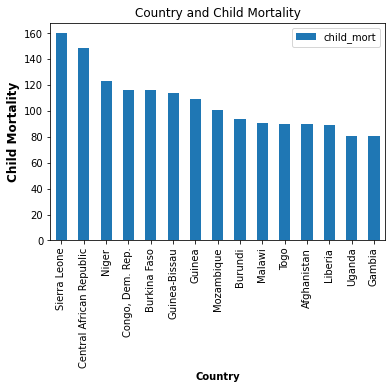

In [80]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

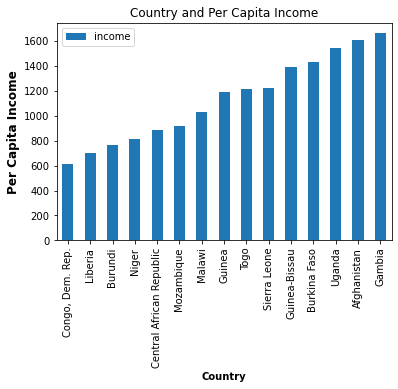

In [81]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

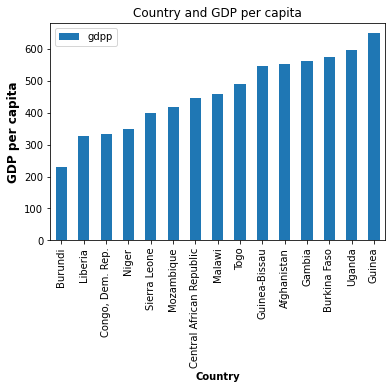

In [82]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

In [84]:
# Final countries list
pd.DataFrame(df_final_list2.reset_index(drop=True).country)

,country
0,Afghanistan
1,Burkina Faso
2,Burundi
3,Central African Republic
4,"Congo, Dem. Rep."
5,Gambia
6,Guinea
7,Guinea-Bissau
8,Liberia
9,Malawi


#### The above 15 countries is the list of countries which are in dire need of aid. The coutries are not in any order. A shorter list of countries that need action immediately can be chosen based on the above histograms 